In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_percentage_error,mean_absolute_error
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/station_data_dataverse3.csv')
df

,sessionId,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,distance,userId,stationId,locationId,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip,kwhTotal
0,1366563,0.00,0014-11-18 15:40:26,0014-11-18 17:11:04,15,17,1.510556,Tue,android,NaN,35897499,582873,461655,0,3,0,1,0,0,0,0,0,0,7.78
1,3075723,0.00,0014-11-19 17:40:26,0014-11-19 19:51:04,17,19,2.177222,Wed,android,NaN,35897499,549414,461655,0,3,0,0,1,0,0,0,0,0,9.74
2,4228788,0.58,0014-11-21 12:05:46,0014-11-21 16:46:04,12,16,4.671667,Fri,android,NaN,35897499,129465,461655,0,3,0,0,0,0,1,0,0,0,6.76
3,3173284,0.00,0014-12-03 19:16:12,0014-12-03 21:02:18,19,21,1.768333,Wed,android,NaN,35897499,569889,461655,0,3,0,0,1,0,0,0,0,0,6.17
4,3266500,0.00,0014-12-11 20:56:11,0014-12-11 21:14:06,20,21,0.298611,Thu,android,NaN,35897499,414088,566549,0,3,0,0,0,1,0,0,0,0,0.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,7021565,0.00,0015-10-01 16:31:18,0015-10-01 19:59:08,16,19,3.463889,Thu,ios,13.352643,59574735,884707,648339,0,2,0,0,0,1,0,0,0,1,6.74
3391,3758092,0.00,0015-10-02 16:28:48,0015-10-02 19:27:05,16,19,2.971389,Fri,ios,13.352643,59574735,884707,648339,0,2,0,0,0,0,1,0,0,1,6.86
3392,5858374,0.00,0015-09-30 16:54:22,0015-09-30 20:24:06,16,20,3.495556,Wed,android,2.337085,32070852,638536,868085,0,3,0,0,1,0,0,0,0,1,6.07
3393,2586645,0.00,0015-09-24 11:43:02,0015-09-24 13:55:12,11,13,2.202778,Thu,ios,4.671064,58023207,818217,700367,1,2,0,0,0,1,0,0,0,1,5.74


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoder=OneHotEncoder()
df['weekday'] = label_encoder.fit_transform(df['weekday'])
df['platform'] = label_encoder.fit_transform(df['platform'])

In [ ]:
X = df[
    ['chargeTimeHrs','startTime','endTime','platform'] +
    ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'] +
    ['userId','stationId','locationId']
]
y = df['kwhTotal']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.svm import SVR

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = SVR()
model.fit(X_train, y_train)

SVR()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R² (coefficient of determination)

In [ ]:
print("RMSE:", rmse)
print("R² Score:", r2)
print("MAPE:",mean_absolute_percentage_error(y_test, y_pred))
print("MAE:",mean_absolute_error(y_test, y_pred))

RMSE: 2.5532177933811906
R² Score: 0.32010076621184236
MAPE: 87327250156818.23
MAE: 1.4242427082289553


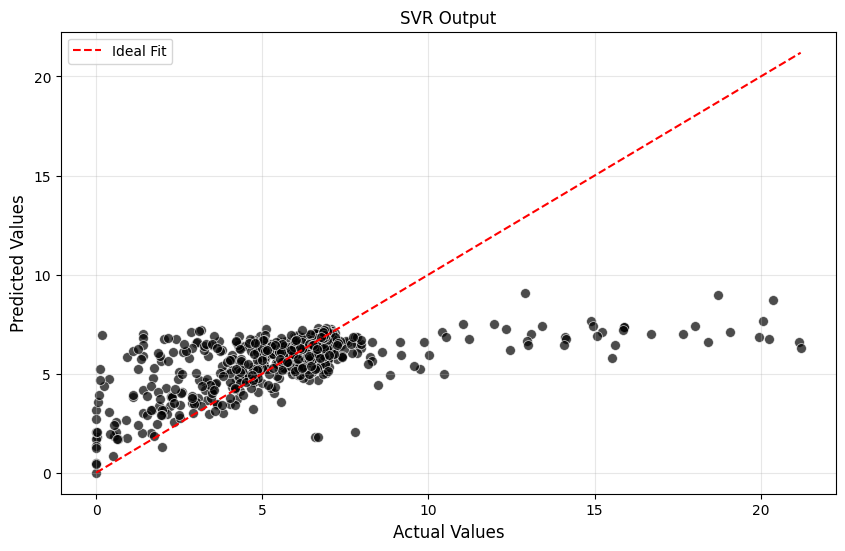

0.32010076621184236


In [ ]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x='Actual', y='Predicted', color='black', s=50, alpha=0.7)
sns.lineplot(x='Actual', y='Actual', data=results_df, color='red', linestyle='--', label="Ideal Fit")
plt.title("Predicted vs Actual Values", fontsize=14)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("SVR Output")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
print(r2)

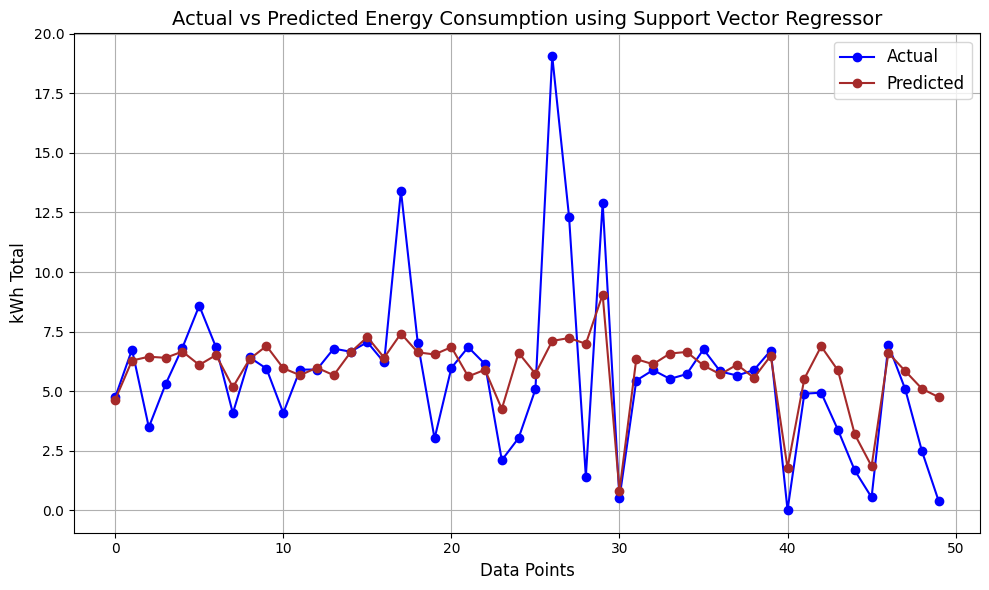

In [ ]:
import matplotlib.pyplot as plt

# Plotting Actual vs Predicted on the same graph
plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(y_test.values[:50], label="Actual", color="blue", marker="o", linestyle="-")

# Plot predicted values
plt.plot(y_pred[:50], label="Predicted", color="brown", marker="o", linestyle="-")

# Add title and labels
plt.title("Actual vs Predicted Energy Consumption using Support Vector Regressor", fontsize=14)
plt.xlabel("Data Points", fontsize=12)
plt.ylabel("kWh Total", fontsize=12)

# Add legend and grid
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()
